# Título del laboratorio: 
"Detección de anomalías mediante algoritmos de agrupación"

## Objetivo: 
Comprender el concepto de detección de anomalías e implementar diferentes algoritmos de clustering para la detección de anomalías.

## Materiales:

Un ordenador con Python 3 y las siguientes librerías instaladas: scikit-learn, matplotlib, pandas.
Un conjunto de datos de uso común para la detección de anomalías, como el conjunto de datos de fraude con tarjetas de crédito (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).










## Punto 1

Comience por cargar el conjunto de datos de fraude con tarjetas de crédito en un marco de datos de pandas y realice un análisis exploratorio de datos (EDA) para familiarizarse con los datos. Realice tareas de preprocesamiento que considere necesarias. 



In [1]:
# para manipular dataframes
import pandas            as pd

# Para Visualización
import matplotlib.pyplot as plt
import seaborn           as sns

# modelos Scikit learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model    import LogisticRegression

# para crear pipelines
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer

# para preproceso de Datos
from sklearn.preprocessing import StandardScaler,RobustScaler, OneHotEncoder

In [140]:
# leemos el set de Datos
df = pd.read_csv('creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [141]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Registros con Fraude: 492
Registros sin Fraude: 284315


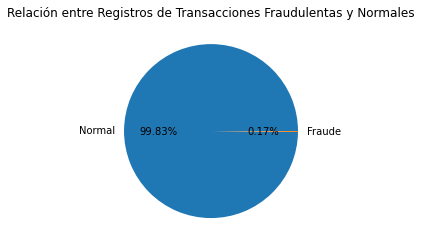

In [4]:
# Inspección de la variable de interés
conteo = df.groupby('Class').size().to_frame().rename(columns={0:'Count'}).reset_index()
labels = ['Normal','Fraude']
plt.pie(conteo['Count'], labels = labels,autopct='%.2f%%')
plt.title("Relación entre Registros de Transacciones Fraudulentas y Normales")
print('Registros con Fraude: {}'.format(int(conteo[conteo['Class']==1]['Count'])))
print('Registros sin Fraude: {}'.format(int(conteo[conteo['Class']==0]['Count'])));

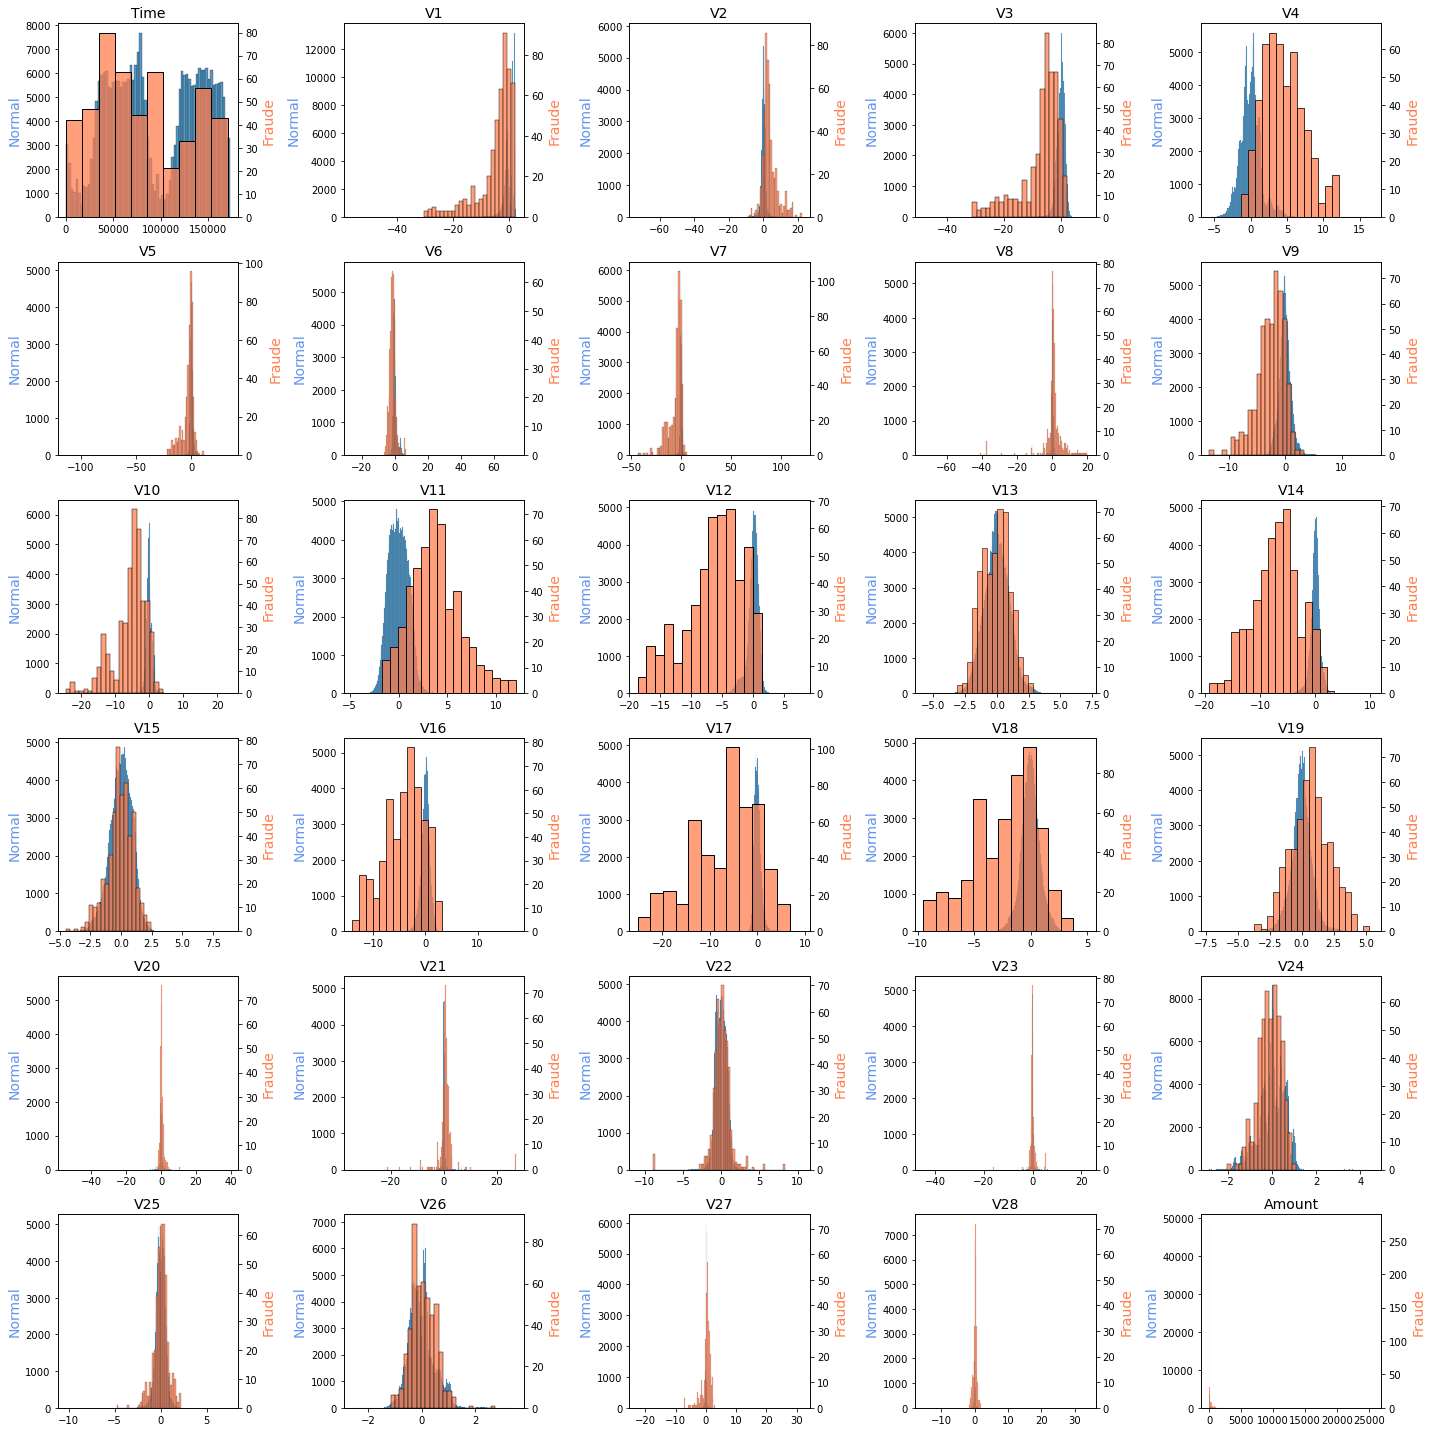

In [31]:
fig, ax1 = plt.subplots(figsize=(20,20))

for i,var in enumerate(df.columns[:-1]):
    plt.subplot(6,5,i+1)
    
    ax1 = sns.histplot(data=df[df["Class"]==0], x=var,label="Normal")
    ax1.set_ylabel("Normal",color="cornflowerblue", fontsize = 14)
    ax1.set_title(var,fontsize = 14)
    ax1.set_xlabel("")
    
    ax2 = ax1.twinx()
    sns.histplot(data=df[df["Class"]==1], x=var,color = 'coral',label="Fraude")
    ax2.set_ylabel("Fraude",color="coral", fontsize = 14)
    
fig.tight_layout()
plt.show()

In [143]:
#dropeamos 3 variables que no nos interesan y mantenemos una base con toda la data

df = pd.read_csv('creditcard.csv')

dfpredictor=df

df=df.drop(["Time","Amount","Class"], axis=1)

df




,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


# Punto 2

Aplicar diferentes algoritmos de clustering, como K-Means, Density-Based Clustering (DBSCAN), Gaussian Mixture Model (GMM), y otros algoritmos de detección de anomalìas en el conjunto de datos de fraude con tarjetas de crédito.

In [107]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(df)

labels = kmeans.labels_




In [11]:

Dbscan = DBSCAN(eps=3, min_samples=80).fit_predict(df)



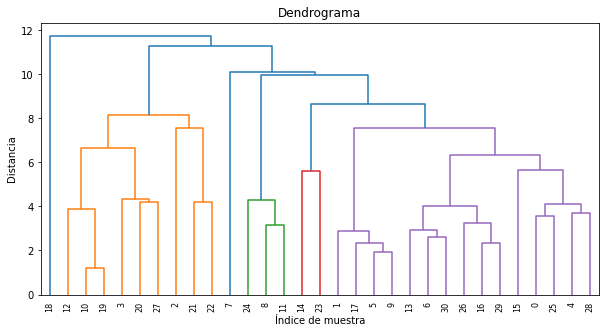

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
dfparaagglo = df[:31]
# Realizar la aglomeración jerárquica
Z = linkage(dfparaagglo, 'ward')

# Graficar el dendrograma
plt.figure(figsize=(10, 5))
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [144]:
#aggomerative clustering
from sklearn.cluster import AgglomerativeClustering
dfparaagglo = df[:50000]

agc = AgglomerativeClustering(n_clusters = 4)
cluster=agc.fit_predict(dfparaagglo)



In [131]:
#GMM
from sklearn.mixture import GaussianMixture

# Ajustar el modelo GMM
gmm = GaussianMixture(n_components=4)
gmm.fit(df)

# Obtener las etiquetas de los clusters
labelsgmm = gmm.predict(df)
probs = gmm.predict_proba(df)


In [168]:
dfLOF = df.iloc[:, 1:3]


from sklearn.neighbors import LocalOutlierFactor


lof_model=LocalOutlierFactor(n_neighbors=28,contamination=0.01)

y_pred= lof_model.fit_predict(dfLOF)
y_pred


array([1, 1, 1, ..., 1, 1, 1])

# Punto 3

Utilice los resultados de la agrupación para identificar transacciones anómalas.

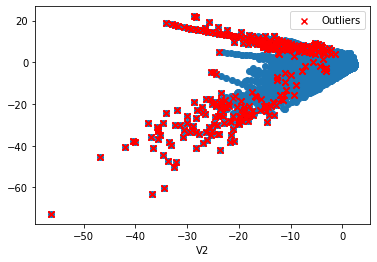

In [118]:
import numpy as np
#k-means 
d = kmeans.transform(df)
dis = np.mean (d,axis=1)
threshold = 5.8*np.mean(d)

#creando una regla para medir outliers
outliers = np.where (d> threshold)[0]

plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(df.iloc[outliers,0], df.iloc[outliers,1],marker = "x", color="r", label="Outliers")
plt.xlabel("V1")
plt.xlabel("V2")
plt.legend()
plt.show()

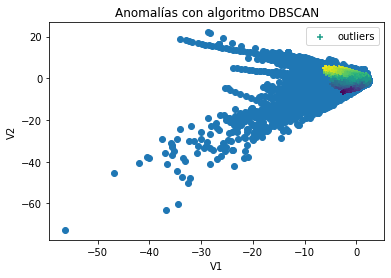

In [153]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.scatter(df[Dbscan != -1].iloc[:, 0], df[Dbscan != -1].iloc[:, 1], c=df[Dbscan != -1].iloc[:,1], marker='+',  label="outliers")

plt.title('Anomalías con algoritmo DBSCAN')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()
plt.show()


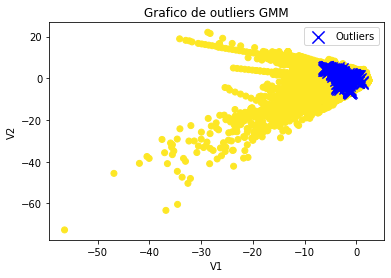

In [91]:
### GMM
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c=np.max(probs, axis=1), cmap='viridis')
# identificar posibles datos anómalos
threshold = 0.7 
outliers = df[np.max(probs, axis=1) < threshold]

# garficar outliers
plt.scatter(outliers.iloc[:, 1], outliers.iloc[:, 2], c='b', marker='x', s=150, label='Outliers')
plt.title('Grafico de outliers GMM')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()
plt.show()






AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

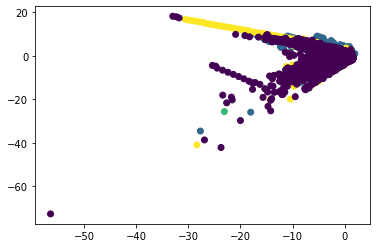

In [21]:
plt.scatter(dfparaagglo['V1'], dfparaagglo['V2'], c = cluster )
outliers = 
centroids = np.zeros((2, df.shape[1]))
for i in range(2):
    centroids[i] = np.mean(df[cluster == i], axis=0)

# calcular la distancia de cada punto en cada clúster a su centroide
distances = np.zeros((df.shape[0], 2))
for i in range(2):
    distances[:, i] = np.linalg.norm(df - centroids[i], axis=1)

# calcular la desviación estándar de las distancias de los puntos del clúster a su centroide
std_distances = np.std(distances, axis=1)

# establecer un umbral para la medida de normalidad/anormalidad
threshold = np.mean(std_distances) + 2*np.std(std_distances)

# detectar outliers
outliers = df[std_distances > threshold]

# visualizar los puntos y resaltar los outliers
import matplotlib.pyplot as plt
plt.scatter(df[:, 0], df[:, 1])
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', s=100)
plt.show()
# garficar outliers



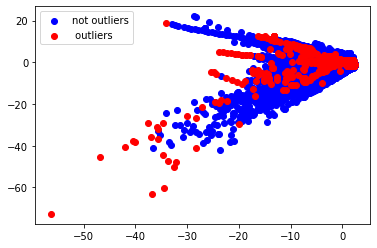

In [169]:
plt.scatter(df.iloc[y_pred == 1,0],df.iloc[y_pred ==1,1],c="b", label ="not outliers")
plt.scatter(df.iloc[y_pred == -1,0],df.iloc[y_pred ==-1,1],c="r", label =" outliers")
plt.legend()
plt.show()


In [151]:
fraudesito =dfpredictor[dfpredictor['Class']==1]

# Punto 4
Visualice los resultados de cada algoritmo de agrupación mediante diagramas de dispersión y compárelos con las etiquetas de clase reales (fraude frente a no fraude).


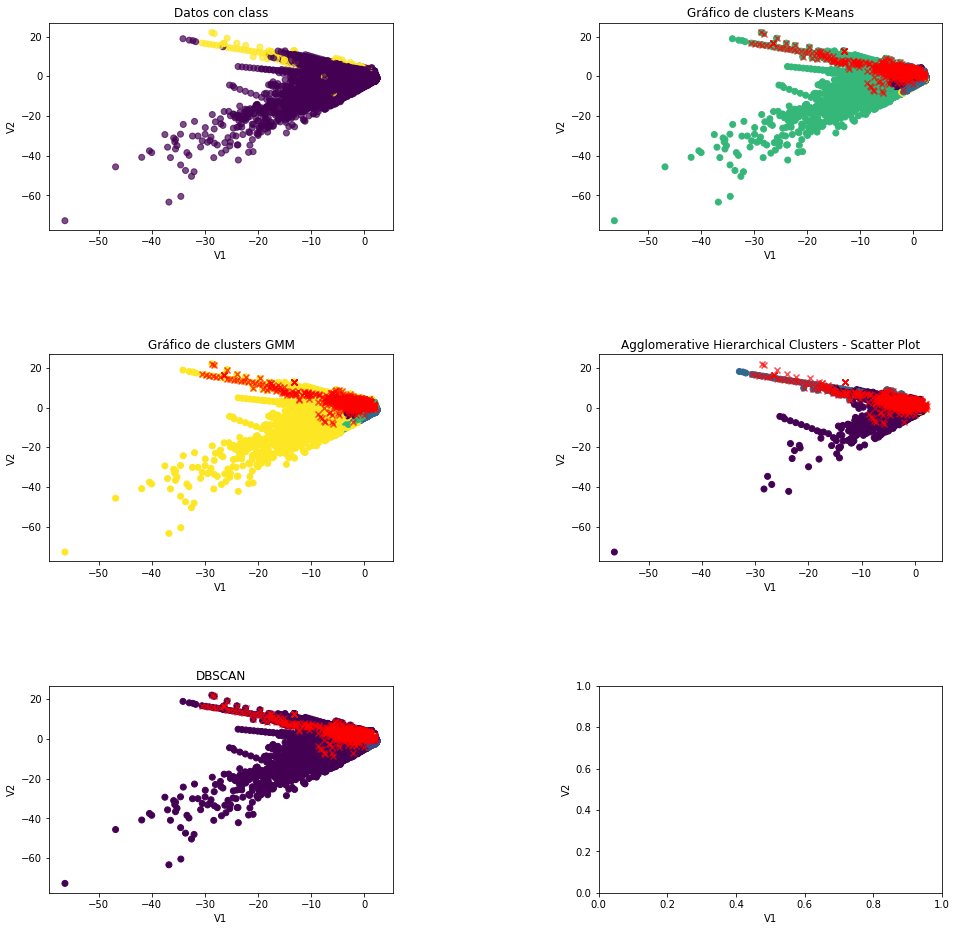

In [159]:


fig, ax = plt.subplots(3,2)
fig.set_size_inches(16, 16)
fig.subplots_adjust(hspace=0.6, wspace=0.6)



#visualizacion dataset
ax[0,0].scatter(dfpredictor["V1"],dfpredictor["V2"],c=dfpredictor["Class"],alpha=0.7)
ax[0,0].set_title('Datos con class')
#visualizacion de k-means
ax[0,1].scatter(dfpredictor["V1"],dfpredictor["V2"], c=labels)
ax[0,1].set_title('Gráfico de clusters K-Means')
ax[0,1].scatter(fraudesito.iloc[:,1],fraudesito.iloc[:,2],c="red", marker="x", alpha = 0.7)
#visualizacion con GMM
ax[1,0].scatter(df["V1"], df["V2"], c=labelsgmm)
ax[1,0].set_title('Gráfico de clusters GMM')
ax[1,0].scatter(fraudesito.iloc[:,1],fraudesito.iloc[:,2],c="red", marker="x", alpha = 0.7)

#visualizacion con Agglomerativeclustering
ax[1,1].scatter(dfparaagglo['V1'], dfparaagglo['V2'], c = cluster )
ax[1,1].set_title("Agglomerative Hierarchical Clusters - Scatter Plot")
ax[1,1].scatter(fraudesito.iloc[:,1],fraudesito.iloc[:,2],c="red", marker="x", alpha = 0.7)

ax[2,0].scatter(df["V1"], df["V2"], c=Dbscan)
ax[2,0].set_title('DBSCAN')
ax[2,0].scatter(fraudesito.iloc[:,1],fraudesito.iloc[:,2],c="red", marker="x", alpha = 0.7)



# Agregamos etiquetas de eje y un título
for ax in ax.flat:
    ax.set_xlabel('V1')
    ax.set_ylabel('V2')


# Mostramos el gráfico
plt.show()

# Punto 5
Discutir los pros y los contras de cada algoritmo y hacer recomendaciones sobre qué algoritmo es el más adecuado para este conjunto de datos específico.




* en el informe

# Punto 6

Evaluar el rendimiento de cada algoritmo utilizando parámetros como la precisión, la recuperación y la puntuación F1.

In [137]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score

y_true= dfpredictor["Class"].values

y_hat= kmeans.predict(df)

matrizconfu= confusion_matrix(y_true,y_hat)
precision= precision_score(y_true,y_hat,average="macro")
recall= recall_score(y_true,y_hat,average="macro")
f1= f1_score(y_true,y_hat,average="macro")

print(matrizconfu)
#precision , verdaderos positivos y verdaderos negativos sobre total
print("Precision:"+str(precision))
# true positive - false positive
print("Recall:"+str(recall))
# 
print("F1:"+str(f1))


[[133762 126446   7052  17055]
 [   151    131    210      0]
 [     0      0      0      0]
 [     0      0      0      0]]
Precision:0.24997683634710727
Recall:0.18418282374310296
F1:0.1604306338644684


c:\Users\OMEN Laptop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
y_true= dfpredictor["Class"].values

y_hat= Dbscan

matrizconfu= confusion_matrix(y_true,y_hat)
precision= precision_score(y_true,y_hat,average="macro")
recall= recall_score(y_true,y_hat,average="macro")
f1= f1_score(y_true,y_hat,average="macro")

print(matrizconfu)
#precision , verdaderos positivos y verdaderos negativos sobre total
print("Precision:"+str(precision))
# true positive - false positive
print("Recall:"+str(recall))
# 
print("F1:"+str(f1))


[[     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [ 35329 189694  11710  30162   1789  13080    579    114    981    200
      86    255     86    154     96]
 [   492      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [     0  

c:\Users\OMEN Laptop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
y_true= dfpredictor["Class"].values

y_hat= gmm.predict(df)

matrizconfu= confusion_matrix(y_true,y_hat)
precision= precision_score(y_true,y_hat,average="macro")
recall= recall_score(y_true,y_hat,average="macro")
f1= f1_score(y_true,y_hat,average="macro")

print(matrizconfu)
print()
#precision , verdaderos positivos y verdaderos negativos sobre total
print("Precision:"+str(precision))
# true positive - false positive
print("Recall:"+str(recall))
# 
print("F1:"+str(f1))

[[ 94729  61496 106114  21976]
 [    26      3     43    420]
 [     0      0      0      0]
 [     0      0      0      0]]

Precision:0.24994359735708094
Recall:0.08482020650403645
F1:0.12497341488342945


c:\Users\OMEN Laptop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Resultados esperados:

1- Código para cargar y preprocesar el conjunto de datos de fraude con tarjetas de crédito.

2- Código para aplicar cada algoritmo de clustering para la detección de anomalías

3- Código para evaluar el rendimiento de cada algoritmo mediante precisión, recuperación y puntuación F1. 

4- Un informe resumiendo los resultados, incluyendo gráficos de dispersión y discusión de los pros y contras de cada algoritmo.